# Project Overview

This project explores publicly available education data to uncover patterns in student performance and demographic factors.

The analysis demonstrates how schools and EdTech platforms can use data to identify risk areas, plan interventions, and support data-driven decision-making.

In [3]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
sns.set(style="whitegrid")

In [21]:
df = pd.read_csv("C:/Users/frank/Downloads/archive/StudentsPerformance.csv") 
#Students Performance in Exams dataset
#The dataset is used for educational and portfolio demonstration purposes.
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Rename Columns

In [22]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [25]:
df = df.rename(columns={
    "race/ethnicity": "race_group",
    "parental level of education": "parent_education",
    "lunch": "lunch_type",
    "test preparation course": "test_prep",
    "math score": "math_score",
    "reading score": "reading_score",
    "writing score": "writing_score"
})

In [29]:
df["average_score"] = df[
    ["math_score", "reading_score", "writing_score"]
].mean(axis=1)

df.head()

,gender,race_group,parent_education,lunch_type,test_prep,math_score,reading_score,writing_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1000 non-null   object 
 1   race_group        1000 non-null   object 
 2   parent_education  1000 non-null   object 
 3   lunch_type        1000 non-null   object 
 4   test_prep         1000 non-null   object 
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   average_score     1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Dataset Shape & Structure

In [33]:
df.shape

(1000, 9)

# Data Types & Null Check

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            1000 non-null   object 
 1   race_group        1000 non-null   object 
 2   parent_education  1000 non-null   object 
 3   lunch_type        1000 non-null   object 
 4   test_prep         1000 non-null   object 
 5   math_score        1000 non-null   int64  
 6   reading_score     1000 non-null   int64  
 7   writing_score     1000 non-null   int64  
 8   average_score     1000 non-null   float64
dtypes: float64(1), int64(3), object(5)
memory usage: 70.4+ KB


# Statistical Summary

In [37]:
df.describe

<bound method NDFrame.describe of      gender race_group    parent_education    lunch_type  test_prep  \
0    female    group B   bachelor's degree      standard       none   
1    female    group C        some college      standard  completed   
2    female    group B     master's degree      standard       none   
3      male    group A  associate's degree  free/reduced       none   
4      male    group C        some college      standard       none   
..      ...        ...                 ...           ...        ...   
995  female    group E     master's degree      standard  completed   
996    male    group C         high school  free/reduced       none   
997  female    group C         high school  free/reduced  completed   
998  female    group D        some college      standard  completed   
999  female    group D        some college  free/reduced       none   

     math_score  reading_score  writing_score  average_score  
0            72             72             74     

# Distribution of Average Scores

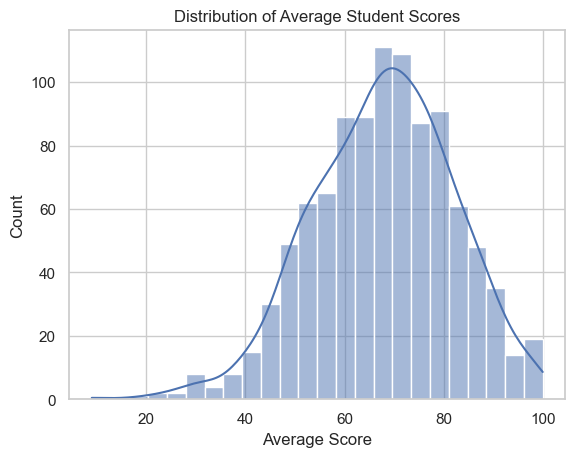

In [39]:
plt.figure()
sns.histplot(df["average_score"], kde=True)
plt.title("Distribution of Average Student Scores")
plt.xlabel("Average Score")
plt.ylabel("Count")
plt.show()

# Performance by Gender

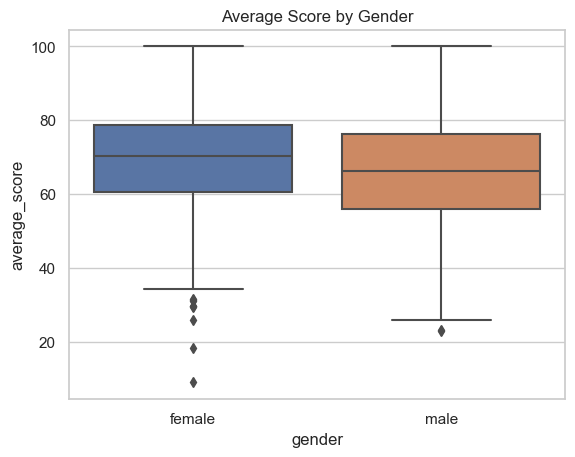

In [50]:
plt.figure()
sns.boxplot(x="gender", y="average_score", data=df)
plt.title("Average Score by Gender")
plt.show()

Analysis by gender shows differences in score distribution across groups. While both genders demonstrate strong performers, variability within each group suggests that performance outcomes are influenced by multiple factors beyond gender alone.

This reinforces the importance of data-driven interventions that focus on individual and contextual factors rather than assumptions.

# Performance by Lunch

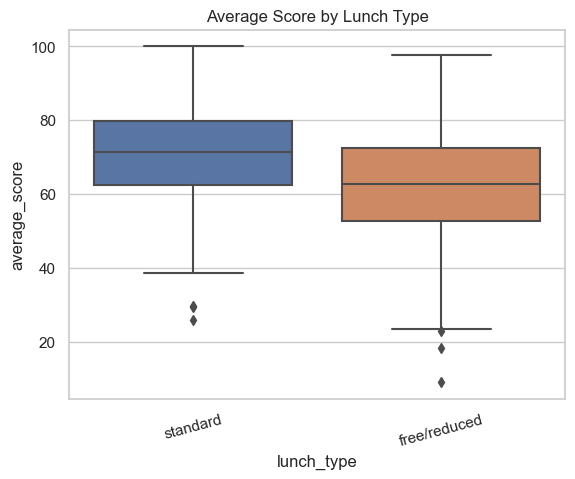

In [42]:
plt.figure()
sns.boxplot(x="lunch_type", y="average_score", data=df)
plt.title("Average Score by Lunch Type")
plt.xticks(rotation=15)
plt.show()

# Test Preparation Impact

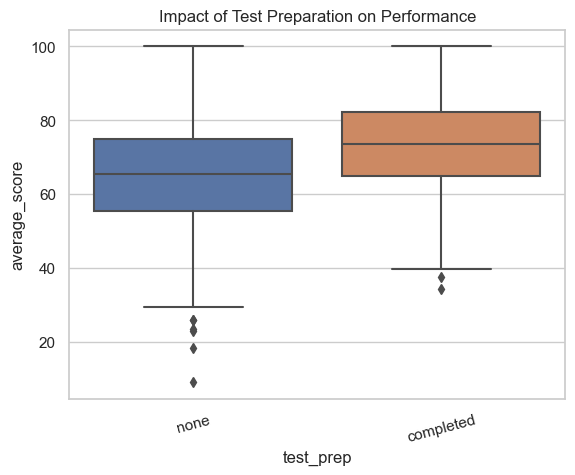

In [44]:
plt.figure()
sns.boxplot(x="test_prep", y="average_score", data=df)
plt.title("Impact of Test Preparation on Performance")
plt.xticks(rotation=15)
plt.show()

Students who completed a test preparation course consistently achieved higher average scores across all subjects. This suggests that structured preparation programs can significantly improve outcomes.

This finding supports investment in preparatory resources, digital learning platforms, and structured academic support programs as scalable interventions.

# Performance Band

In [46]:
def performance_band(score):
    if score < 60:
        return "High Risk"
    elif score < 75:
        return "Medium Risk"
    else:
        return "Low Risk"

df["performance_risk"] = df["average_score"].apply(performance_band)

# Risk distribution

In [47]:
df["performance_risk"].value_counts(normalize=True) * 100

performance_risk
Medium Risk    39.1
Low Risk       32.4
High Risk      28.5
Name: proportion, dtype: float64

By grouping students into performance risk categories (High, Medium, Low), the analysis provides a clear framework for prioritization. A meaningful percentage of students fall into the high-risk category, signaling the need for focused academic monitoring.

This segmentation approach mirrors real-world education analytics systems used to guide interventions and resource allocation.

# Risk of socioeconomic indicator

In [48]:

pd.crosstab(
    df["lunch_type"],
    df["performance_risk"],
    normalize="index"
) * 100

performance_risk,High Risk,Low Risk,Medium Risk
lunch_type,,,
free/reduced,43.661972,21.126761,35.211268
standard,20.155039,38.604651,41.240310


Lunch type, used as a proxy for socioeconomic status, reveals a strong relationship with academic performance. Students associated with subsidized lunch programs show a higher concentration in medium- and high-risk performance categories.

For school administrators and EdTech providers, this insight highlights where academic support, fee planning flexibility, and intervention programs may have the greatest impact.

# Key Takeaways for Decision-Makers

- Academic risk is not evenly distributed across the student population.

- Socioeconomic indicators correlate strongly with performance outcomes.

- Structured preparation programs show measurable positive impact.

- Risk segmentation enables proactive, targeted intervention rather than reactive support.

These insights demonstrate how education data can be transformed into actionable intelligence for schools and EdTech solutions.